In [25]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [26]:
dir(iris) # to display the data structure of the whole so-called iris


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
iris.feature_names # to show what are the features in the dataset

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
# to create the dataset for processing
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# to display top 5 rows to double check
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# to append the label to the dataset
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
# to find out what 0, 1 and 2 means
iris.target_names # 0=setosa, 1=versicolor, 2=virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
len(df) #find out how many rows I have

150

In [32]:
df[df.target == 0].head() #display first 5 lines in setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df[df.target == 1].head()#display first 5 lines in versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [34]:
df[df.target == 2].head() #display first 5 lines in virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [35]:
#I Want to plot out the data to get some visualization
from matplotlib import pyplot as plt
#I want to plot to in the same html file
%matplotlib inline

In [36]:
#create three datasets
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [37]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+' )
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='x' )
plt.scatter(df2['sepal length (cm)'],df0['sepal width (cm)'], color='red', marker='o' )

In [39]:
from sklearn.model_selection import train_test_split
# train_test_split is to randomly select 0.x amount of data for testing purpuse


In [40]:
X = df.drop('target', axis='columns')
y = df.target
#alway upper case X and lower case y


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [42]:
len(X_train)


120

In [43]:
len(X_test)


30

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel for simplicity
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)


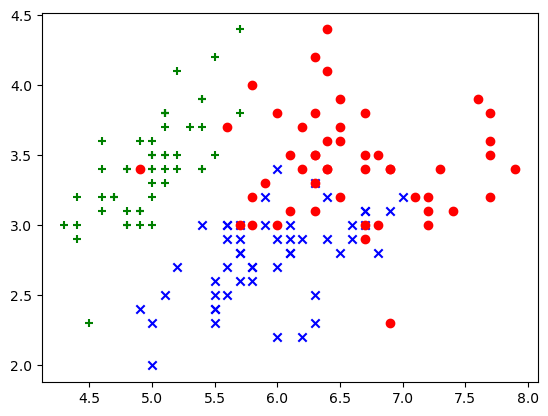

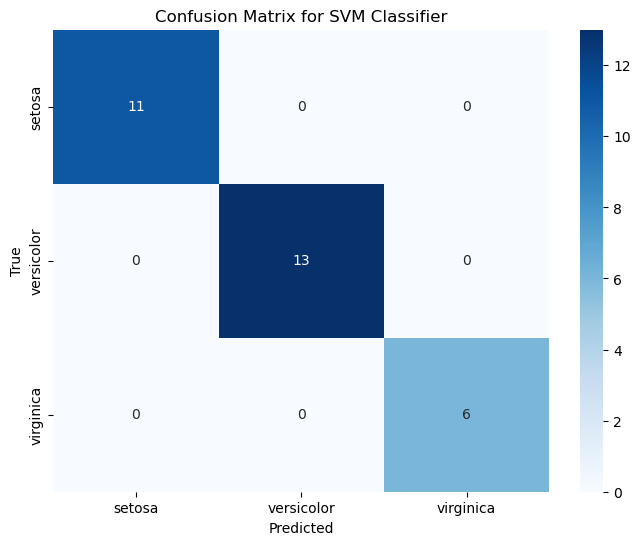

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Print out a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
